#Setting up Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Loading Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/chatagent/agent.csv")

In [3]:
df.head(5)

,Unnamed: 0,date_,year_,month_,client_id,client_name,model,vertical,country,rate,total_chats,total_leads,total_greetings_fired,total_traffic,revenue,total_lead,total_chat,total_revenue,total_traffics,total_greetings_fireds
0,0,2022-01-01,2022,1,0,James Cornelius Studios,PPL,Real Estate,France,1,100.0,34.0,5345.0,8798.0,34.0,37857.0,67768.0,37857.0,4900393.0,3757123.0
1,1,2022-01-01,2022,1,1,Luis Vanos Studios,PPL,Car Leasing,Argentina,5,17.0,5.0,332.0,517.0,25.0,3850.0,13834.0,19250.0,421100.0,324398.0
2,2,2022-01-01,2022,1,2,Jayne Peco Inc.,PPC,Textile,USA,1,3.0,1.0,47.0,93.0,3.0,602.0,1814.0,1814.0,122130.0,60165.0
3,3,2022-01-01,2022,1,3,Linda Plungy LLP,PPC,Manufacturing,India,1,2.0,1.0,49.0,71.0,2.0,614.0,1818.0,1818.0,119050.0,60451.0
4,4,2022-01-01,2022,1,4,Angie Willis Company,PPC,Water Softeners,India,1,2.0,1.0,55.0,61.0,2.0,576.0,1778.0,1778.0,121424.0,60105.0


In [4]:
df.describe()

,Unnamed: 0,year_,month_,client_id,rate,total_chats,total_leads,total_greetings_fired,total_traffic,revenue,total_lead,total_chat,total_revenue,total_traffics,total_greetings_fireds
count,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,143700.000000,1.437000e+05,1.437000e+05,1.437000e+05
mean,71849.500000,2022.856994,5.989562,74.500000,2.733333,21.512575,8.135351,716.514628,1069.625435,70.502004,7793.666667,20609.046667,6.754092e+04,1.024701e+06,6.864210e+05
std,41482.761179,0.773661,3.332633,43.300459,1.606935,48.673294,18.909804,1516.758851,2539.144732,194.474789,17230.500237,45050.109222,1.804009e+05,2.326266e+06,1.392726e+06
min,0.000000,2022.000000,1.000000,0.000000,1.000000,0.000000,0.000000,44.000000,59.000000,0.000000,555.000000,1650.000000,1.650000e+03,1.186940e+05,5.970100e+04
25%,35924.750000,2022.000000,3.000000,37.000000,1.000000,2.000000,1.000000,67.000000,137.000000,3.000000,602.000000,1782.000000,3.522000e+03,1.209400e+05,6.029000e+04
50%,71849.500000,2023.000000,6.000000,74.500000,2.000000,9.000000,2.000000,214.000000,300.000000,27.000000,3696.500000,13574.000000,3.388250e+04,4.239005e+05,3.238800e+05
75%,107774.250000,2023.000000,9.000000,112.000000,4.000000,21.000000,6.000000,508.000000,681.000000,70.000000,3856.000000,13985.000000,6.807000e+04,4.370190e+05,3.318560e+05
max,143699.000000,2024.000000,12.000000,149.000000,6.000000,398.000000,159.000000,11938.000000,19900.000000,2388.000000,93567.000000,252589.000000,1.515534e+06,1.264610e+07,7.192361e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143700 entries, 0 to 143699
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              143700 non-null  int64  
 1   date_                   143700 non-null  object 
 2   year_                   143700 non-null  int64  
 3   month_                  143700 non-null  int64  
 4   client_id               143700 non-null  int64  
 5   client_name             143700 non-null  object 
 6   model                   143700 non-null  object 
 7   vertical                143700 non-null  object 
 8   country                 143700 non-null  object 
 9   rate                    143700 non-null  int64  
 10  total_chats             143700 non-null  float64
 11  total_leads             143700 non-null  float64
 12  total_greetings_fired   143700 non-null  float64
 13  total_traffic           143700 non-null  float64
 14  revenue             

#Data Cleaning

In [6]:
df.drop(['Unnamed: 0'],inplace= True, axis=1)

In [7]:
df['total_chats'].value_counts()

,count
total_chats,
1.0,16002
2.0,14673
0.0,10886
3.0,10832
4.0,9244
...,...
152.0,6
167.0,5
305.0,5


In [8]:
rows_with_nulls = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_nulls)

Rows with missing values:
Empty DataFrame
Columns: [date_, year_, month_, client_id, client_name, model, vertical, country, rate, total_chats, total_leads, total_greetings_fired, total_traffic, revenue, total_lead, total_chat, total_revenue, total_traffics, total_greetings_fireds]
Index: []


#Calculating derived metrics

In [9]:
df['Conversion (%)'] = (df['total_leads'] / df['total_chats']) * 100
df['RPC (Rate Per Chat)'] = df['total_revenue'] / df['total_chats']
df['Greeting Conversion (%)'] = (df['total_chats'] / df['total_greetings_fireds']) * 100
df['Engagement (%)'] = (df['total_chats'] / df['total_traffic']) * 100


In [10]:
df.head(5)

,date_,year_,month_,client_id,client_name,model,vertical,country,rate,total_chats,...,revenue,total_lead,total_chat,total_revenue,total_traffics,total_greetings_fireds,Conversion (%),RPC (Rate Per Chat),Greeting Conversion (%),Engagement (%)
0,2022-01-01,2022,1,0,James Cornelius Studios,PPL,Real Estate,France,1,100.0,...,34.0,37857.0,67768.0,37857.0,4900393.0,3757123.0,34.000000,378.570000,0.002662,1.136622
1,2022-01-01,2022,1,1,Luis Vanos Studios,PPL,Car Leasing,Argentina,5,17.0,...,25.0,3850.0,13834.0,19250.0,421100.0,324398.0,29.411765,1132.352941,0.005240,3.288201
2,2022-01-01,2022,1,2,Jayne Peco Inc.,PPC,Textile,USA,1,3.0,...,3.0,602.0,1814.0,1814.0,122130.0,60165.0,33.333333,604.666667,0.004986,3.225806
3,2022-01-01,2022,1,3,Linda Plungy LLP,PPC,Manufacturing,India,1,2.0,...,2.0,614.0,1818.0,1818.0,119050.0,60451.0,50.000000,909.000000,0.003308,2.816901
4,2022-01-01,2022,1,4,Angie Willis Company,PPC,Water Softeners,India,1,2.0,...,2.0,576.0,1778.0,1778.0,121424.0,60105.0,50.000000,889.000000,0.003328,3.278689


#Top and Bottom N Clients

Aggregated by client name to find performance metrics for top and bottom clients

In [11]:
client_metrics = df.groupby('client_name').agg({
    'total_chats': 'sum',
    'total_leads': 'sum',
    'revenue': 'sum',
    'Conversion (%)': 'mean',
    'RPC (Rate Per Chat)': 'mean',
    'Engagement (%)': 'mean'
})

top_clients = client_metrics.nlargest(5, 'revenue')
bottom_clients = client_metrics.nsmallest(5, 'revenue')



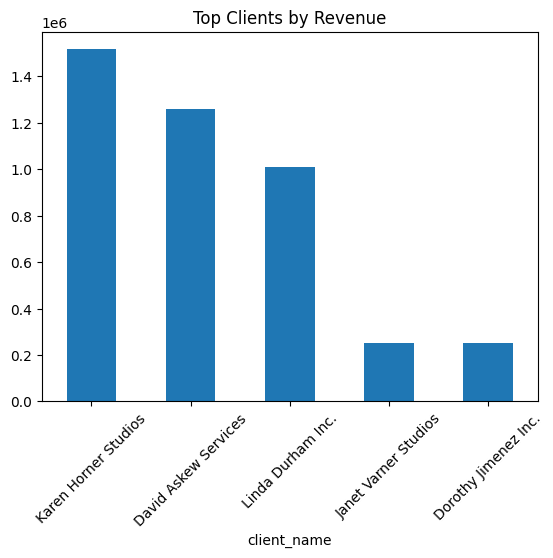

In [12]:
top_clients['revenue'].plot(kind='bar', title='Top Clients by Revenue')
plt.xticks(rotation=45)
plt.show()


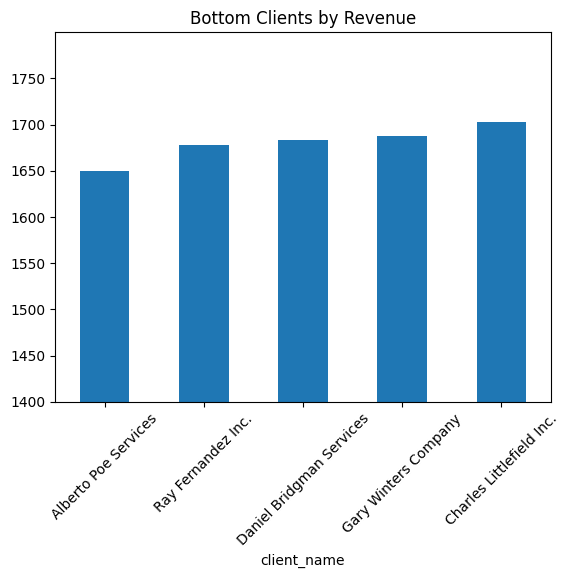

In [13]:
bottom_clients['revenue'].plot(kind='bar', title='Bottom Clients by Revenue')
plt.ylim(1400, 1800)
plt.yticks(range(1400, 1800, 50))
plt.xticks(rotation=45)
plt.show()

#Inferential Analysis

Correlation Analysis for dataset metrics

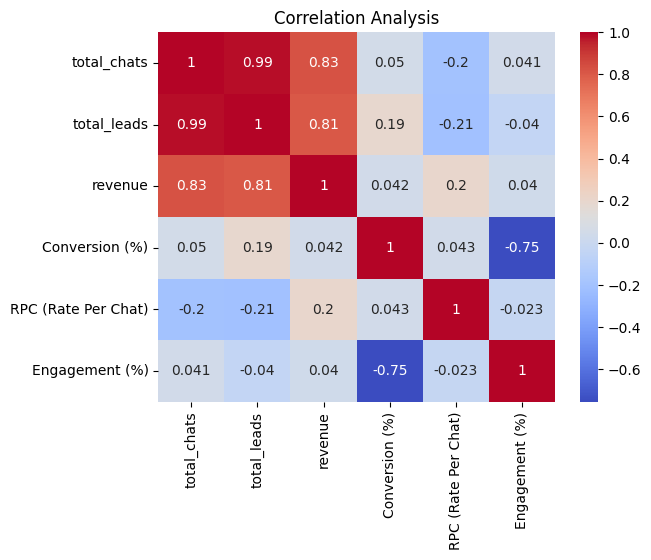

In [14]:
correlations = client_metrics.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


#Trend Analysis

Last 6 months revenue trends

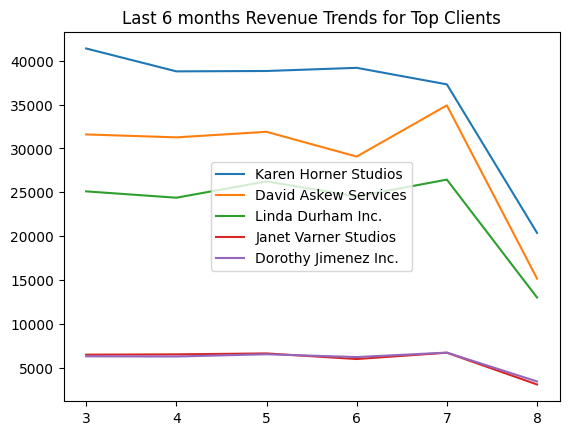

In [15]:
df['date_'] = pd.to_datetime(df['date_'])
start_date = '2024-03-01'
end_date = '2024-09-30'

last_six_months = df[(df['date_'] >= start_date) & (df['date_'] <= end_date)]
last_six_months = last_six_months.groupby(['client_name', 'month_']).agg({
    'total_chats': 'sum',
    'total_leads': 'sum',
    'revenue': 'sum',
}).reset_index()

top_client_names = top_clients.index
for client in top_client_names:
    client_data = last_six_months[last_six_months['client_name'] == client]
    plt.plot(client_data['month_'], client_data['revenue'], label=client)

plt.title("Last 6 months Revenue Trends for Top Clients")
plt.legend()
plt.show()

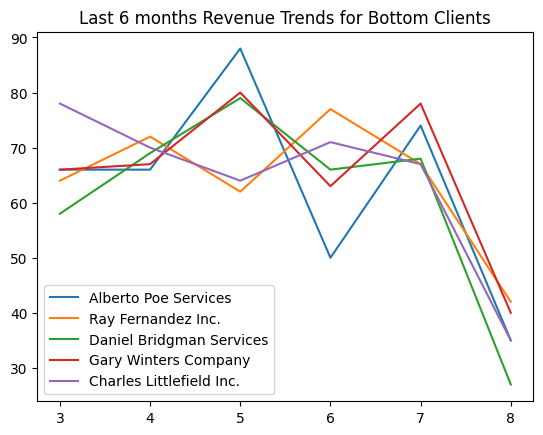

In [16]:
bottom_client_names = bottom_clients.index
for client in bottom_client_names:
    client_data = last_six_months[last_six_months['client_name'] == client]
    plt.plot(client_data['month_'], client_data['revenue'], label=client)

plt.title("Last 6 months Revenue Trends for Bottom Clients")
plt.legend()
plt.show()

#Revenue Bucketing

Clients are placed into buckets based on their monthly revenue

In [17]:
def assign_bucket(revenue):
    if revenue < 500:
        return 'Bronze'
    elif revenue < 1500:
        return 'Silver'
    elif revenue < 3000:
        return 'Gold'
    else:
        return 'Platinum'

df['month_revenue'] = df.groupby(['client_id', 'year_', 'month_'])['revenue'].transform('sum')
df['bucket'] = df['month_revenue'].apply(assign_bucket)

bucket_summary = df.groupby('bucket').agg({'revenue': 'sum', 'total_chats': 'sum'})
print(bucket_summary)


            revenue  total_chats
bucket                          
Bronze     221414.0     153029.0
Gold      2243029.0     671193.0
Platinum  6746587.0    1763771.0
Silver     920108.0     503364.0


#Extrapolated Revenue for August 2024

Extrapolated Revenue for August 2024 is an estimation of the total revenue for the month of August 2024, as only partial data is only available

In [18]:
df['date_'] = pd.to_datetime(df['date_'])
august_2024 = df[(df['month_'] == 8) & (df['year_'] == 2024)]


last_day = august_2024['date_'].dt.day.max()


august_2024.set_index('date_', inplace=True)
august_2024['extrapolated_revenue'] = (august_2024['revenue'] / last_day) * 31

print(august_2024[['client_name', 'revenue', 'extrapolated_revenue']])


                        client_name  revenue  extrapolated_revenue
date_                                                             
2024-08-01  James Cornelius Studios     28.0             57.866667
2024-08-01       Luis Vanos Studios     40.0             82.666667
2024-08-01          Jayne Peco Inc.      2.0              4.133333
2024-08-01         Linda Plungy LLP      1.0              2.066667
2024-08-01     Angie Willis Company      0.0              0.000000
...                             ...      ...                   ...
2024-08-15  Doreen Difonzo Services      2.0              4.133333
2024-08-15       Amanda Cox Studios     51.0            105.400000
2024-08-15         Mark Pettus Inc.      4.0              8.266667
2024-08-15  Patricia Frias Services     65.0            134.333333
2024-08-15     Alberto Poe Services      4.0              8.266667

[2250 rows x 3 columns]


<ipython-input-18-89987e6e0b8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  august_2024['extrapolated_revenue'] = (august_2024['revenue'] / last_day) * 31


#Forecasting

Forecasting Model used is Holt-Winters (time-series forecasting technique)

In [19]:
time_series_data = df.groupby('date_').agg({
    'total_chats': 'sum',
    'total_leads': 'sum',
    'revenue': 'sum'
})
time_series_data.reset_index(inplace=True)

In [20]:
hw_model = ExponentialSmoothing(time_series_data['revenue'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()

forecast_steps = 6
forecast = hw_fit.forecast(steps=forecast_steps)

last_actual_date = time_series_data['date_'].max()
forecast_dates = pd.date_range(start=last_actual_date + pd.Timedelta(days=1), periods=forecast_steps, freq='M')

forecast_df = pd.DataFrame({'date_': forecast_dates, 'forecast': forecast.values})
print('Forecasted Revenue for 2024')
print(forecast_df)

Forecasted Revenue for 2024
       date_      forecast
0 2024-08-31  10668.893094
1 2024-09-30  10690.077707
2 2024-10-31  10735.177598
3 2024-11-30  10601.038888
4 2024-12-31  10659.300020
5 2025-01-31  10797.487237


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-20-d1ccea86ea2e>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=last_actual_date + pd.Timedelta(days=1), periods=forecast_steps, freq='M')


In [21]:
actual_2024_data = time_series_data[time_series_data['date_'] >= '2024-01-01']

actual_2024_data = actual_2024_data.set_index('date_')['revenue']
forecast_df = forecast_df.set_index('date_')['forecast']
combined_df = actual_2024_data.combine_first(forecast_df)

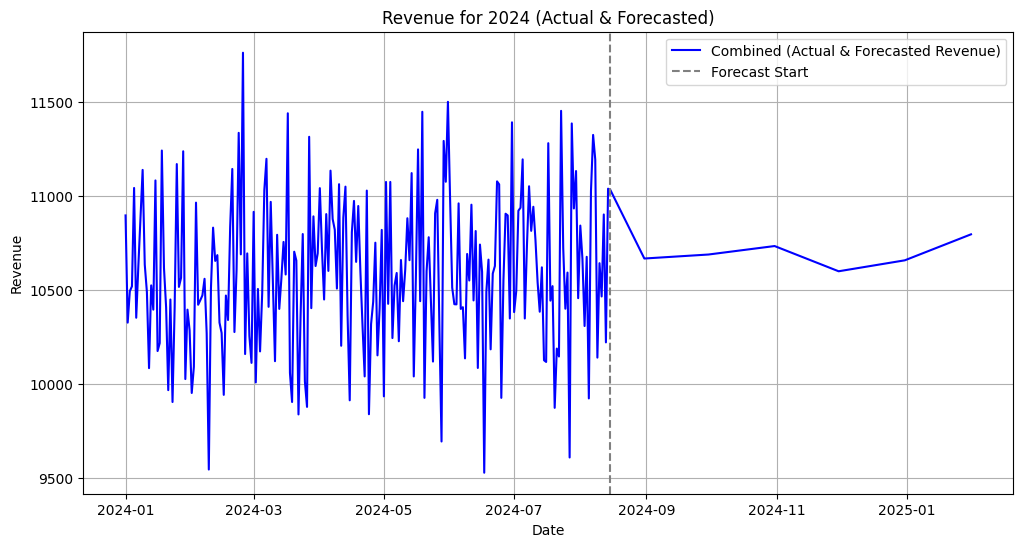

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df, label='Combined (Actual & Forecasted Revenue)', color='blue')
plt.axvline(x=last_actual_date, color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Revenue for 2024 (Actual & Forecasted)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()